# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [588]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns


In [589]:
# Data Files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path  = 'data/Study_results.csv'

In [590]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

In [591]:
# Show mouse data
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [592]:
# Show study data
study_results = pd.read_csv(study_results_path)
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [593]:
# Combine the data into a single DataFrame

dataframe = pd.merge(study_results, mouse_metadata)
print(dataframe.shape)

# Display the data table for preview
dataframe.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [594]:
# Checking the number of mice.
dataframe['Mouse ID'].nunique()

249

In [595]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dataframe.groupby(['Mouse ID','Timepoint']).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [596]:
# Optional: Get all the data for the duplicate mouse ID.
df = dataframe['Mouse ID'] == "g989"
print(dataframe.shape)
dataframe.loc[df]

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [597]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = dataframe["Mouse ID"] != "g989"
clean_data = dataframe.loc[df].reset_index(drop=True)
clean_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [598]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()


248

## Summary Statistics

In [599]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped= dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"] 

mean = grouped.mean()
median = grouped.median()
variance = grouped.var()
std_dev = grouped.std()
sem = grouped.sem()
 
summary_df = pd.DataFrame({ 'mean': mean, 'median': median, 'variance': variance, 'std_dev': std_dev, 'sem': sem})
print(summary_df)

                   mean     median   variance   std_dev       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [600]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = dataframe.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
print(summary_stats)



             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Rows for Each Drug Regimen'}, xlabel='Drug Regimen'>

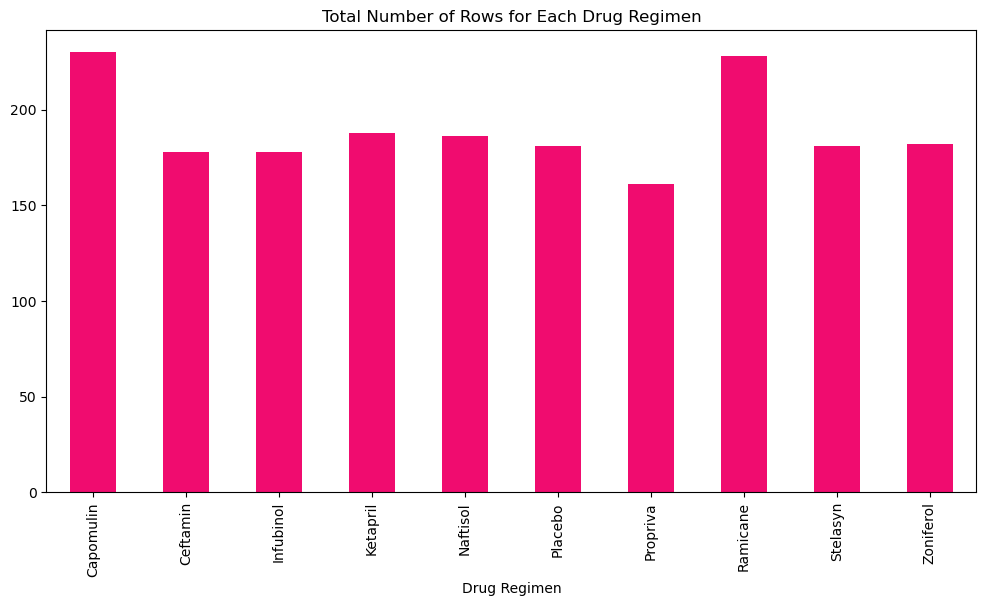

In [601]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_count = dataframe.groupby('Drug Regimen').size()
row_count.plot(kind='bar', figsize=(12, 6), color='#f00c6f', title='Total Number of Rows for Each Drug Regimen')

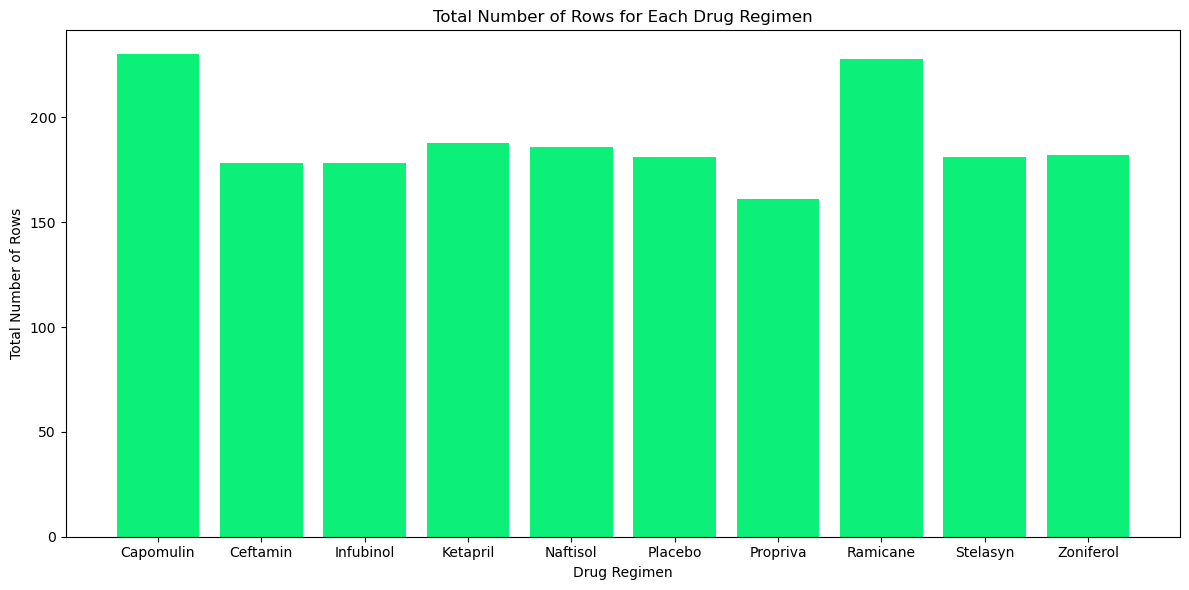

In [602]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_count = dataframe.groupby('Drug Regimen').size()

# use pyplot to create a bar plot
plt.figure(figsize=(12, 6))  
plt.bar(row_count.index, row_count.values, color='#0cf07a')

# labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# show the plot
plt.tight_layout() 
plt.show()

<Axes: title={'center': 'Count of Male and Female Mice'}, ylabel='count'>

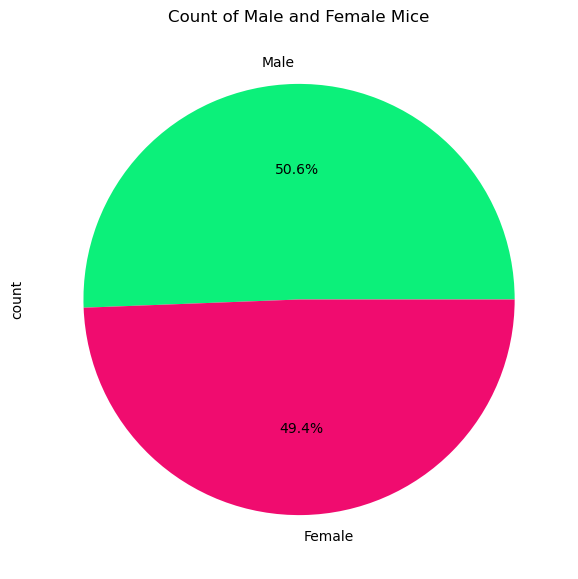

In [603]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
row_count = dataframe.groupby('Drug Regimen').size()

# Get the unique mice with their gender
count_for_chart = dataframe["Sex"].value_counts()

# Make the pie chart
count_for_chart.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), colors=["#0cf07a", "#f00c6f"], legend=False, title='Count of Male and Female Mice')


## Quartiles, Outliers and Boxplots

In [604]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = dataframe.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments= pd.merge(greatest_timepoint, dataframe, on=["Mouse ID", "Timepoint"], how="left")
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = treatments["Drug Regimen"].isin(drugs)
df3 = treatments.loc[mask].reset_index(drop=True)
print(treatments.shape)
treatments.head()

(249, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [605]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df3['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_data = df3.loc[df3 ["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset
    tumor_volumes.append(treatment_data)
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")
    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}\n")


Outliers for Infubinol: [36.3213458]
Q1: 54.04860769, Q3: 65.52574285, IQR: 11.477135160000003

Outliers for Ceftamin: []
Q1: 48.72207785, Q3: 64.29983003, IQR: 15.577752179999997

Outliers for Ramicane: []
Q1: 31.56046955, Q3: 40.65900627, IQR: 9.098536719999998

Outliers for Capomulin: []
Q1: 32.37735684, Q3: 40.1592203, IQR: 7.781863460000004



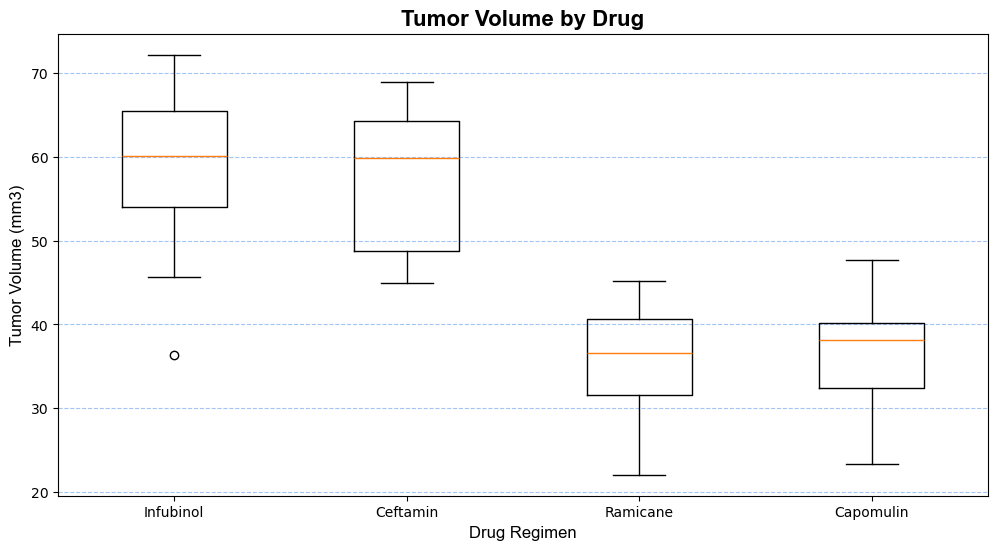

In [606]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 6))

plt.boxplot(tumor_volumes, tick_labels=treatments)

# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="#83b1f2", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

## Line and Scatter Plots

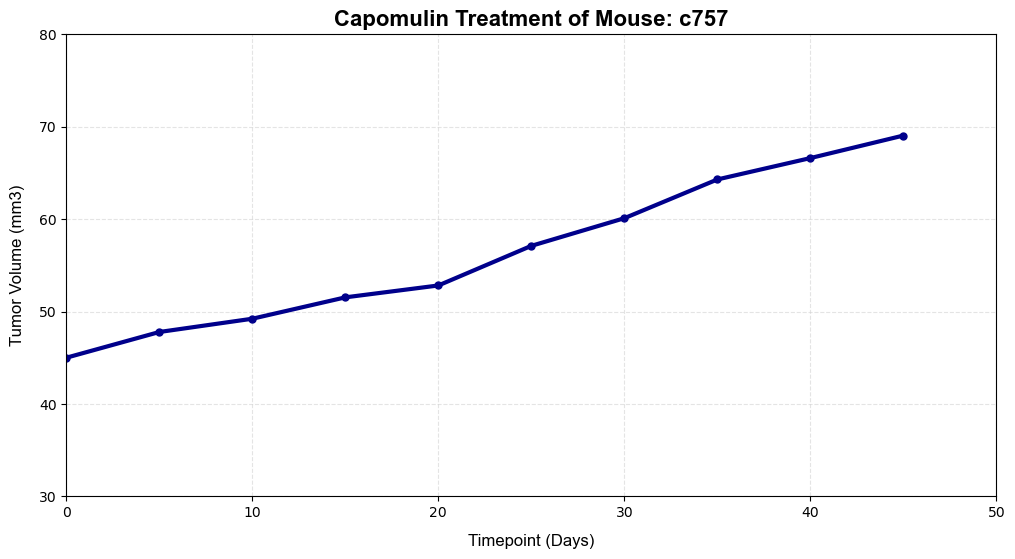

In [607]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "c757"
df_tv = dataframe.loc[dataframe["Mouse ID"] == mouse].sort_values(by="Timepoint", ascending=True)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a line plot with a different line style
plt.plot(df_tv.Timepoint, df_tv["Tumor Volume (mm3)"], color="darkblue", linewidth=3, linestyle='-', marker='o', markersize=5)

# Customizations

# Add Labels/Title
plt.xlabel("Timepoint (Days)", fontfamily="Arial", fontsize=12, labelpad=10)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12, labelpad=10)
plt.title(f"Capomulin Treatment of Mouse: {mouse}", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits (example limits)
plt.xlim(0, 50)
plt.ylim(30, 80)

# Add a background grid with light transparency
plt.grid(linestyle="--", color="lightgrey", alpha=0.6)

# Show the plot
plt.show()

In [608]:
regimen = "Capomulin"

df5 = dataframe.loc[dataframe["Drug Regimen"] == regimen]
df6 = df5.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()
df6.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0


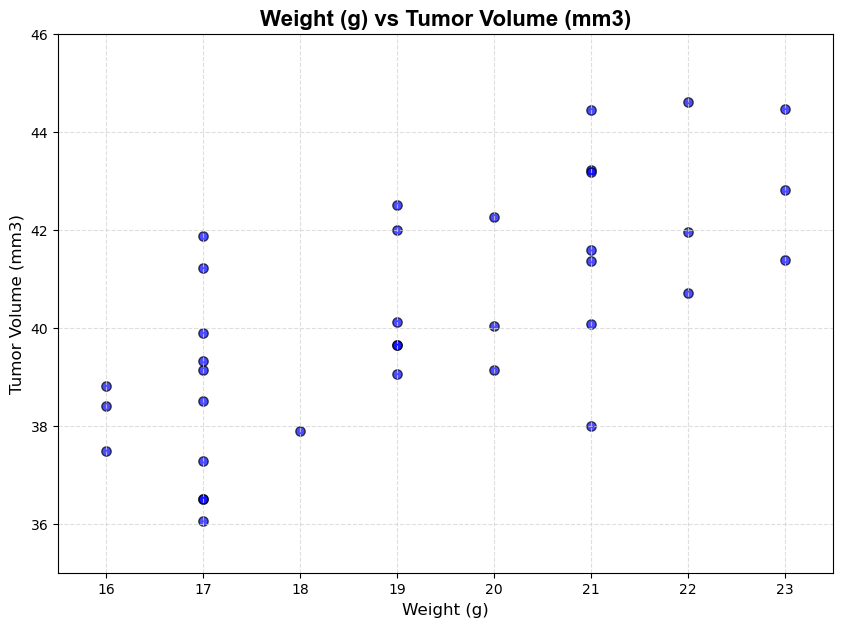

In [650]:
# Group by Mouse ID and Drug Regimen, and calculate the mean tumor volume for each mouse
df_drug_agg = dataframe.groupby(['Mouse ID']).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

# Create the scatter plot with aggregated data
plt.figure(figsize=(10, 7))
plt.scatter(df_drug_agg["Weight (g)"], df_drug_agg["Tumor Volume (mm3)"], color="blue", marker="o", s=45, edgecolor="black", alpha=0.7)
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

# # Set X/Y Limits
plt.ylim(35, 46)
plt.xlim(15.5, 23.5)

# Add labels and title
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.show()

## Correlation and Regression

In [652]:
# Calculate the correlation coefficient and a linear regression model
#Write your x and y values
x_values = df_drug_agg["Weight (g)"]
y_values = df_drug_agg["Tumor Volume (mm3)"]

# show the regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 1.1x + 21.02


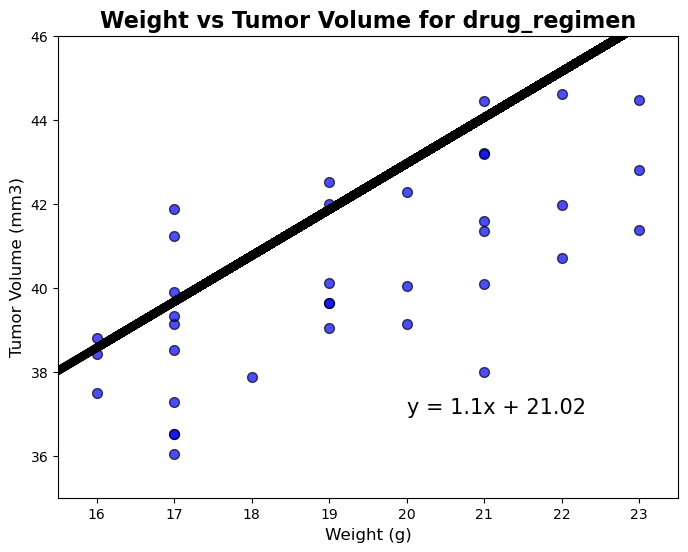

In [662]:
df_drug_agg = dataframe.groupby(["Mouse ID"]).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

# Create the scatter plot with aggregated data
plt.figure(figsize=(8, 6))
plt.scatter(df_drug_agg["Weight (g)"], df_drug_agg["Tumor Volume (mm3)"], color="blue", marker="o", s=50, edgecolor="black", alpha=0.7)
plt.plot(df_drug_agg["Weight (g)"], regress_values, color="black", linewidth=6) # the regression line

# Add labels and title
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.title(f"Weight vs Tumor Volume for {'drug_regimen'}", fontsize=16, fontweight="bold")

# # Set X/Y Limits
plt.ylim(35, 46)
plt.xlim(15.5, 23.5)

# Show the plot
plt.annotate(line_eq, (20, 37), fontsize=15, color="black")
plt.show()